#Data Loading & Exploring the dataset before data prepocessing

**Objective**:  The project aimed to predict mental illness category from text data using machine learning models.

The dataset contained 53k mental health records and has 3 columns including unnamed, statement and status. And we can see there are missing values in the statement column. There are seven categories of classification in "status" column.


In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/AhmedSSoliman/sentiment-analysis-for-mental-health-Combined-Data/sentiment-analysis-for-mental-health-Combined Data.csv")

In [ ]:
sample_df= df.sample(frac=1/4, random_state = 42).reset_index(drop=True)

In [ ]:
# Check the structure and summary
print(sample_df.info())
print(sample_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13261 entries, 0 to 13260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13261 non-null  int64 
 1   statement   13155 non-null  object
 2   status      13261 non-null  object
dtypes: int64(1), object(2)
memory usage: 310.9+ KB
None
         Unnamed: 0
count  13261.000000
mean   26517.650856
std    15389.528523
min        1.000000
25%    13066.000000
50%    26719.000000
75%    39827.000000
max    53033.000000


In [ ]:
#Checking how the data look like
sample_df.head()

,Unnamed: 0,statement,status
0,22261,Just as the the title says. I feel like one is...,Depression
1,41400,a blackened sky encroached tugging behind it m...,Depression
2,20065,"It gives you insomnia, which in turn makes you...",Depression
3,30036,"Hello all, I'm a new submitter to this channel...",Normal
4,780,Thank God the CB is over for Eid,Normal


In [ ]:
sample_df['status'].value_counts()

,count
status,
Normal,4154
Depression,3860
Suicidal,2572
Anxiety,966
Bipolar,711
Stress,697
Personality disorder,301


In [ ]:
sample_df.shape

(13261, 3)

#Data Preprocessing

In this step, the "Unnamed: 0" column is dropped as it is unncesssary for the further analysis. Missing values and duplicated data are checked and dropped the missing data and duplicated data. As a result, the new dataset contains

*   Columns: 2 (statement, status).
*   No Missing Values: All rows have valid statement and status entries.
*   No Duplicates: Every row is unique.

In [ ]:
#Dropping the unwanted column
data = sample_df.drop(columns=["Unnamed: 0"])

In [ ]:
#Checking the missing data
data.isnull().sum()

,0
statement,106
status,0


In [ ]:
#Dropping the missing data
data = data.dropna()

In [ ]:
#Checking the duplicated data
data.duplicated().sum()

129

In [ ]:
#Dropping the duplicated data
data.drop_duplicates(inplace=True)

In [ ]:
#Checking the Final Shape
data.shape

(13026, 2)

In [ ]:
#Resets the index of the DataFrame after dropping rows.
data = data.reset_index(drop=True)

## Data Cleaning

In the next step, I cleaned the statement column as it is the text data by removing special characters, numbers and stop words, lemmatize the text, and stemming the text and copied the preprocessed data into a new dataframe.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import PorterStemmer
import spacy
# Download stop words list (if not already downloaded)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Load SpaCy's language model (for lemmatization)
nlp = spacy.load("en_core_web_sm")

def remove_stop_words(text):
    # Tokenize the text and filter out stop words
    words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)
def lemmatize_text(text):
    doc = nlp(text)  # Process text with SpaCy
    lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_punct])  # Skip punctuation
    return lemmatized_text
def stem_word(text):  # Stemming
    stemmer = nltk.stem.PorterStemmer()
    words = [stemmer.stem(word) for word in text.split()]
    return ' '.join(words)
def clean_text(text):
    """Clean text by removing URLs, special characters, and numbers."""
    #Check if text is string type before applying re.sub
    if isinstance(text, str):
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
        text = re.sub(r"[^a-zA-Z\s]", '', text)  # Remove special characters and numbers
        return text.lower().strip()  # Convert to lowercase and strip whitespace
    else:
        #Handle non-string values (e.g., NaN) by returning an empty string or a placeholder
        return ""

def preprocess_text(text):
    """Apply all preprocessing steps to the text."""
    text = clean_text(text)            # Step 1: Clean the text
    text = remove_stop_words(text)     # Step 2: Remove stop words
    text = lemmatize_text(text)        # Step 3: Lemmatize text
    text = stem_word(text)             # Step 4: Apply stemming
    return text
# Apply preprocessing to the DataFrame
df = sample_df.copy()
for i, sentence in enumerate(tqdm(sample_df["statement"], desc="Processing Text")):
    df.loc[i, "statement"] = preprocess_text(sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
Processing Text: 100%|██████████| 13261/13261 [03:15<00:00, 67.85it/s]


## Explanatory Data Analysis

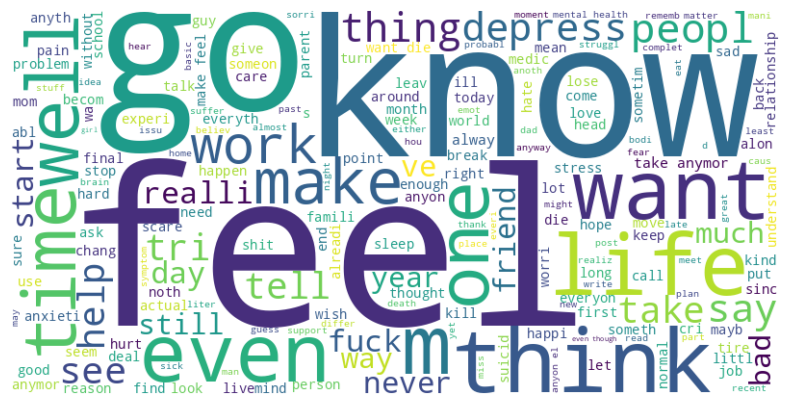

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Generate a word cloud
text = " ".join(review for review in df.statement)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<ipython-input-20-2e0081c2c5c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='viridis')


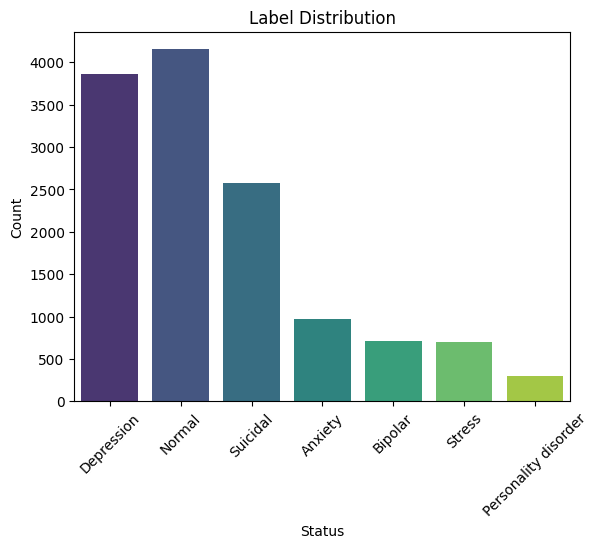

In [ ]:
# Plot label distribution
sns.countplot(x='status', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Status")
plt.ylabel("Count" )
plt.title("Label Distribution")
plt.show()


#Loading the model
There is not enough RAM for loading the model so I have to switch the runtime type to GPU.

In [ ]:
from transformers import AutoTokenizer,AutoModelForCausalLM,pipeline
import torch


In [ ]:
# Check GPU availability
import torch
import tensorflow as tf
import spacy
from transformers import AutoModel, AutoTokenizer

if torch.cuda.is_available():
    print(f"PyTorch GPU: {torch.cuda.get_device_name(0)}")
else:
    print("PyTorch GPU not available.")

print(f"TensorFlow GPUs: {len(tf.config.list_physical_devices('GPU'))}")
spacy.prefer_gpu()
print("SpaCy is using GPU:", spacy.require_gpu())

# PyTorch Example
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = torch.randn(3, 3).to(device)
print("PyTorch Tensor:", tensor)

# TensorFlow Example
with tf.device('/GPU:0'):
    result = tf.matmul(tf.constant([[1.0, 2.0]]), tf.constant([[3.0], [4.0]]))
print("TensorFlow Result:", result)

# Hugging Face Example
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased").to(device)
inputs = tokenizer("Hello, GPU!", return_tensors="pt").to(device)
outputs = model(**inputs)
print("Hugging Face Output:", outputs.last_hidden_state.shape)

# SpaCy Example
nlp = spacy.load("en_core_web_sm")
doc = nlp("GPU-powered text processing!")
print("SpaCy Tokens:", [token.text for token in doc])


PyTorch GPU: Tesla T4
TensorFlow GPUs: 1
SpaCy is using GPU: True
PyTorch Tensor: tensor([[-0.4837, -1.0205, -1.0612],
        [-0.9411, -1.4880,  0.3098],
        [-1.1435,  0.8090,  0.9276]], device='cuda:0')
TensorFlow Result: tf.Tensor([[11.]], shape=(1, 1), dtype=float32)
Hugging Face Output: torch.Size([1, 7, 768])
SpaCy Tokens: ['GPU', '-', 'powered', 'text', 'processing', '!']


In [ ]:
# Downloading model
model_id = "kingabzpro/Llama-3.1-8B-Instruct-Mental-Health-Classification"

tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
        model_id,
        return_dict=True,
        low_cpu_mem_usage=True,
        torch_dtype=torch.float16,
        device_map="auto",
        trust_remote_code=True,
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

#Test model output

Testing the output of the model with a sample text and the result is Depression.

In [ ]:


text = "I can't sleep at night. I think about my past decisions and blame myself for it."
prompt = f"""Classify the text into Normal, Depression, Suicidal, Anxiety, Bipolar, Stress, Personality disorder and return the answer as the corresponding mental health disorder label.
text: {text}
label: """.strip()

input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
outputs = model.generate(input_ids, max_new_tokens=2, do_sample=True, temperature=0.1)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Classify the text into Normal, Depression, Suicidal, Anxiety, Bipolar, Stress, Personality disorder and return the answer as the corresponding mental health disorder label.
text: I can't sleep at night. I think about my past decisions and blame myself for it.
label: Depression



#Model Evaluation

I only take the first 2000 rows to test the model because apparently the runtime can't handle a large dataset.

In [ ]:
# Function to get the prediction
def get_label(text):
    prompt = f"""Classify the text into Normal, Depression, Suicidal, Anxiety, Bipolar, Stress, Personality disorder and return the answer as the corresponding mental health disorder label.
        text: {text}
        label: """.strip()
    # pipeline for the LLM
    pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.float16,
    device_map="auto",
    )

    outputs = pipe(prompt, max_new_tokens=2, do_sample=True, temperature=0.1)
    return outputs[0]['generated_text'].split("label: ")[-1].strip()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred = df["statement"][:2000].apply(get_label) # Only predict the first 2000 values

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [ ]:
# Replace incorrect predictions
y_pred = ["Suicidal" if label == "Suic" else label for label in y_pred]


In [ ]:
# Accuracy check
print("Accuracy score:", accuracy_score(sample_df["status"][:2000], y_pred))
print("Classification report: \n", classification_report(sample_df["status"][:2000], y_pred))

Accuracy score: 0.6405
Classification report: 
                       precision    recall  f1-score   support

             Anxiety       0.68      0.67      0.67       138
             Bipolar       0.74      0.65      0.69        99
          Depression       0.55      0.81      0.65       613
              Normal       0.71      0.97      0.82       609
Personality disorder       1.00      0.04      0.07        52
              Stress       0.94      0.14      0.25       105
            Suicidal       0.84      0.05      0.10       384

            accuracy                           0.64      2000
           macro avg       0.78      0.48      0.47      2000
        weighted avg       0.70      0.64      0.57      2000



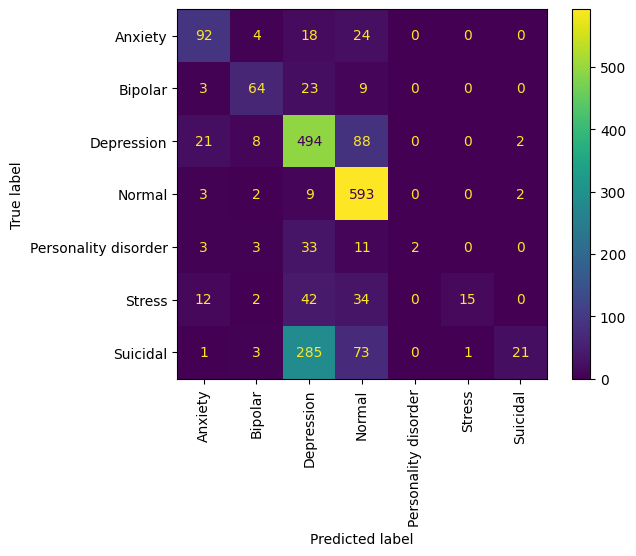

In [ ]:
ConfusionMatrixDisplay.from_predictions(sample_df["status"][:2000], y_pred, xticks_rotation='vertical')

## Accuracy:

The overall accuracy of the model is 64.05%, meaning that 64.05% of the predictions match the true labels.

## Classification Report Insights:

**Precision:** Measures how many of the predicted positive samples are correct.
Highest precision is for "Personality disorder" (1.00), but this might be misleading due to its very low recall.
Relatively high precision for "Stress" (0.94) and "Suicidal" (0.84).

**Recall:** Measures how many actual positive samples are correctly predicted.
High recall for "Normal" (0.97) and "Depression" (0.81).
Extremely low recall for "Personality disorder" (0.04), "Stress" (0.14), and "Suicidal" (0.05).

**F1-score:** Balances precision and recall.
Best F1-score is for "Normal" (0.82), while other categories have lower scores, especially for underrepresented classes like "Personality disorder."

## Confusion Matrix Observations:

**"Normal" and "Depression" dominate predictions:** "Normal" has the highest number of correct predictions (593), and "Depression" is often correctly classified (494).

**Severe misclassifications for "Suicidal":** Most "Suicidal" cases are misclassified as "Depression" (285 cases).

**Poor performance on minor classes:** Classes like "Personality disorder" and "Stress" suffer from low recall and high misclassification rates, likely due to class imbalance.

# Key Observations:

**Imbalanced Classes:**
Smaller classes like "Personality disorder" and "Stress" have significantly fewer samples compared to dominant classes like "Depression" and "Normal." This imbalance likely affects recall and the overall performance of the model on these categories.

**Overlap in Mental Health Categories:**
The confusion matrix shows significant overlap between similar categories, particularly "Suicidal" and "Depression." This suggests that the model struggles to differentiate between nuanced mental health conditions.

**Bias Toward Larger Classes:**
The model performs better on larger classes such as "Normal" and "Depression," while smaller classes (e.g., "Personality disorder," "Stress") are underrepresented in correct predictions.

**Macro vs. Weighted Averages:**
The macro-average metrics are significantly lower than the weighted averages, indicating that performance on smaller classes is disproportionately poor.

# Conclusion:

**Fix Class Imbalance:** The model needs more data for smaller groups like "Personality disorder" and "Stress" or adjustments to treat all groups more equally.

**Improve Differentiation:** The model confuses similar categories, like "Suicidal" and "Depression," so it may need better input features or more detailed training examples.

**Focus on Smaller Groups:** We need to make sure the model recognizes less common categories better, not just the big ones like "Normal" or "Depression."